<a href="https://colab.research.google.com/github/MkSerdyuk/Tropes_Analizer/blob/main/tropes_analizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт материалов и библиотек

In [1]:
! git clone https://github.com/slowwavesleep/TvTropesMovieData.git

Cloning into 'TvTropesMovieData'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 80 (delta 25), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [2]:
import pandas as pd
from collections import Counter
from itertools import chain
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("/content/TvTropesMovieData/data/tropes_movie_data.csv")
df["tropes_list"] = df["tropes"].apply(lambda x: x.split("|"))

In [4]:
df

,tropes_title,tropes,imdb_id,imdb_genres,movielens_id,tmdb_id,movielens_title,movielens_genres,movielens_year,tropes_list
0,ABBATheMovie,ActuallyPrettyFunny|Adorkable|AlmostKiss|AsHim...,75617,Comedy|Drama|Music,26380,14336,ABBA: The Movie (1977),Musical,1977.0,"[ActuallyPrettyFunny, Adorkable, AlmostKiss, A..."
1,ABCsOfDeath2,AbusiveParents|AirVentPassageway|AirVentPassag...,2926810,Comedy|Horror,117312,193726,The ABCs of Death 2 (2014),Comedy|Horror,2014.0,"[AbusiveParents, AirVentPassageway, AirVentPas..."
2,ABNKKBSNPLAko,ComingOfAgeStory|GayBestFriend|GenderInvertedT...,3547428,Comedy,176879,254866,ABNKKBSNPLAKo?! (2014),Comedy|Romance,2014.0,"[ComingOfAgeStory, GayBestFriend, GenderInvert..."
3,ABeautifulMind,AdultFear|AllThereIsToKnowAboutTheCryingGame|A...,268978,Biography|Drama,4995,453,"Beautiful Mind, A (2001)",Drama|Romance,2001.0,"[AdultFear, AllThereIsToKnowAboutTheCryingGame..."
4,ABetterTomorrow,AlmostLethalWeapons|BackupTwin|BadassInANiceSu...,92263,Action|Crime|Drama,26585,11471,"Better Tomorrow, A (Ying hung boon sik) (1986)",Crime|Drama|Thriller,1986.0,"[AlmostLethalWeapons, BackupTwin, BadassInANic..."
...,...,...,...,...,...,...,...,...,...,...
9257,Zulu,AnachronismStew|AntagonistTitle|ArtisticLicens...,58777,Drama|History|War,5899,14433,Zulu (1964),Action|Drama|War,1964.0,"[AnachronismStew, AntagonistTitle, ArtisticLic..."
9258,Zurich,ABirthdayNotABreak|AGoodWayToDie|AnAesop|Bitte...,3257638,Drama,141632,319513,Zurich (2015),Drama,2015.0,"[ABirthdayNotABreak, AGoodWayToDie, AnAesop, B..."
9259,Zwartboek,AdolfHitlarious|AllIssuesArePoliticalIssues|Am...,389557,Drama|Thriller|War,52042,9075,Black Book (Zwartboek) (2006),Drama|Thriller|War,2006.0,"[AdolfHitlarious, AllIssuesArePoliticalIssues,..."
9260,Zygote,AirventEscape|AnAxeToGrind|ArtificialHuman|Art...,7078780,Horror|Sci-Fi|Short,175643,464111,Zygote (2017),Horror|Sci-Fi,2017.0,"[AirventEscape, AnAxeToGrind, ArtificialHuman,..."


# Самописные функции анализа данных

In [5]:
def intersection(df, trop):
  tropes = df[df["tropes"].str.contains(trop)][["tropes", "tropes_list"]]
  unique_tropes = set()
  for trops in tropes["tropes_list"]:
    unique_tropes.update(trops)
  l = []
  for t in unique_tropes:
    if trop in t:
      continue
    l.append([sum(tropes["tropes"].str.contains(t))  , t])
  l.sort(key=lambda x: x[0], reverse=True)
  return l, tropes

In [6]:
def print_intersections(df, trop):
  l,tropes = intersection(df, trop)
  for i in range(len(l)):
    if l[i][0] < 10:
      break
    print(f"Троп \'{str(l[i][1])}\' встречается больше всех ({str(l[i][0])} раз)")

In [7]:
def top_tropes_by_year(df, year: int):
  trop_counter = Counter()
  year_tropes = df[df["movielens_year"].apply(lambda x: x == year)]["tropes_list"]
  trop_counter.update(chain(*year_tropes))
  return trop_counter

In [8]:
def visualize_preiod(df, year_start, year_end, n:int = 5):
  tropes = Counter()
  year_start, year_end = min(year_start, year_end), max(year_start, year_end)
  for year in range(year_start, year_end+1):
    tropes.update(top_tropes_by_year(df, year))
  top_tropes = tropes.most_common(n)
  Ys = []
  for trop in top_tropes:
    Y = []
    for year in range(year_start, year_end+1):
      top = top_tropes_by_year(df, year)
      Y.append(top[trop[0]])
    Ys.append(Y)
  fig, ax = plt.subplots(figsize=(16, 9))
  X = []
  for i in range(year_start, year_end+1):
    X.append(i)
  for i in range(len(Ys)):
    bottom = [0 for j in range(len(Ys[0]))]
    for j in range(len(Ys[i])):
      for k in range(i):
        bottom[j] += Ys[k][j]
    ax.bar(X, Ys[i], label=top_tropes[i][0], bottom=bottom)  
  ax.legend()
  plt.title(f"Топ {n} тропов за период с {year_start} по {year_end} гг.", fontsize=20)
  plt.show()

In [9]:
def visualize_intersection(df, trop, n: int = 5):
  l,tropes = intersection(df, trop)
  l = l[:n]
  fig, ax = plt.subplots(figsize=(21, 9))
  Y, X = list(zip(*l))[0], list(zip(*l))[1]
  plt.title(f"Топ {n} тропов, которые чаще всего встречаются с тропом \"{trop}\"", fontsize=20)
  ax.bar(X, Y)
  plt.show()

In [180]:
def top_tropes(df, n: int):
  trope_counter = Counter()
  trope_counter.update(chain(*df["tropes_list"]))
  return trope_counter.most_common(n)

In [175]:
def top_tropes_by_genre(df, genre, n: int):
    trope_counter = Counter()
    genre_tropes = df.loc[df.imdb_genres.str.contains(genre)].tropes_list
    trope_counter.update(chain(*genre_tropes))
    return trope_counter.most_common(n)

In [176]:
def visualize_top_tropes_by_genre(df, genre, n: int):
  fig, ax = plt.subplots(figsize=(16,9))
  tropes = top_tropes_by_genre(df, genre, n)
  X = []
  Y = []
  for name, count in tropes:
    X.append(name)
    Y.append(count)
  plt.bar(X,Y)
  plt.title(f"Топ {n} тропов в жанре \"{genre}\"")
  plt.show

# Анализ данных

## Задача 1

**Условие**: Вывести самые популярные тропы по жанру 

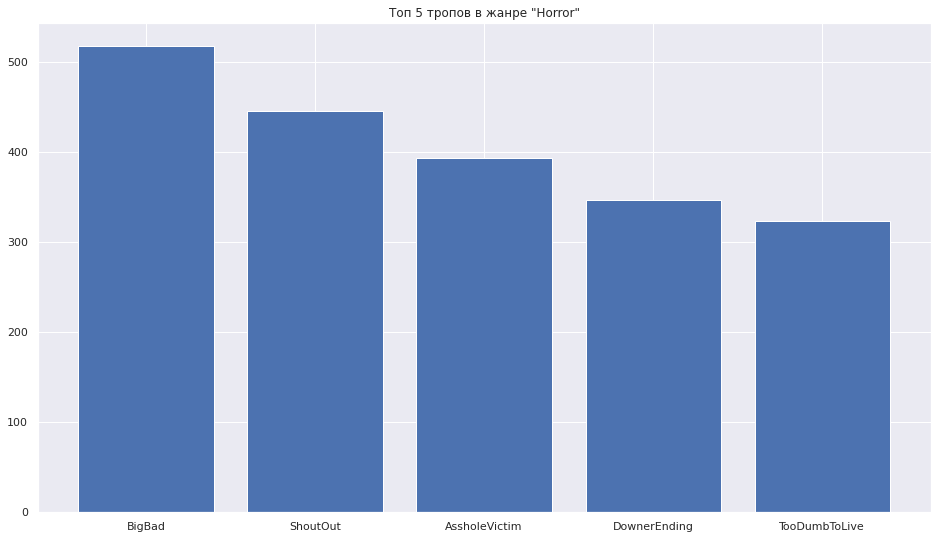

In [177]:
visualize_top_tropes_by_genre(df, "Horror", 5)

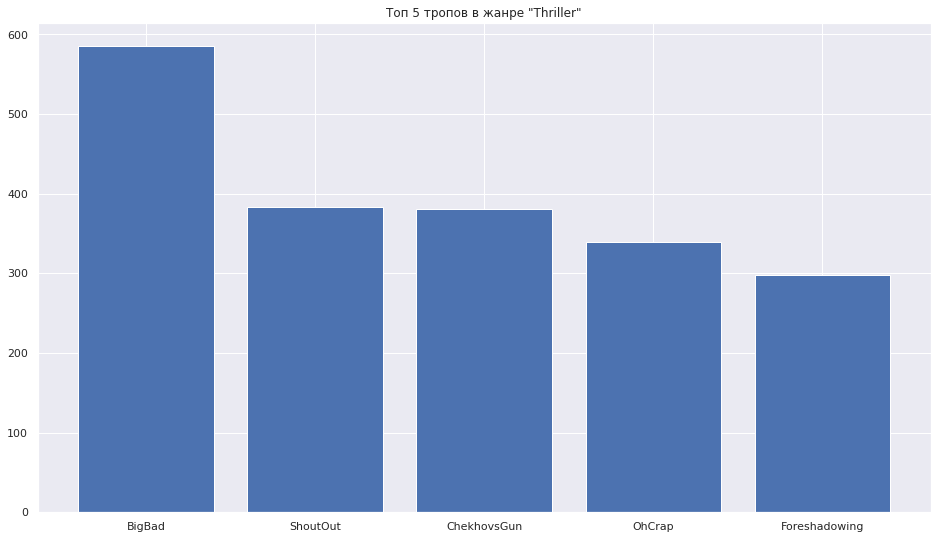

In [ ]:
visualize_top_tropes(df, "Thriller", 5)

## Задача 2

**Условие**:
Найти, сколько раз троп "Спасение принцессы встречается вместе с тропом "Финальный босс"

In [ ]:
l ,boss = intersection(df, "FinalBosss")

In [ ]:
SPtrops = ['YourPrincessIsInAnotherCastle','SaveThePrincess','PrincessAndDragon']

In [ ]:
print('SavePrincess  встречается вместе с FinalBoss', sum([boss.apply(lambda x: t in x).count() for t in SPtrops]), "раз")

SavePrincess  встречается вместе с FinalBoss 6 раз


Визуализируем данные:

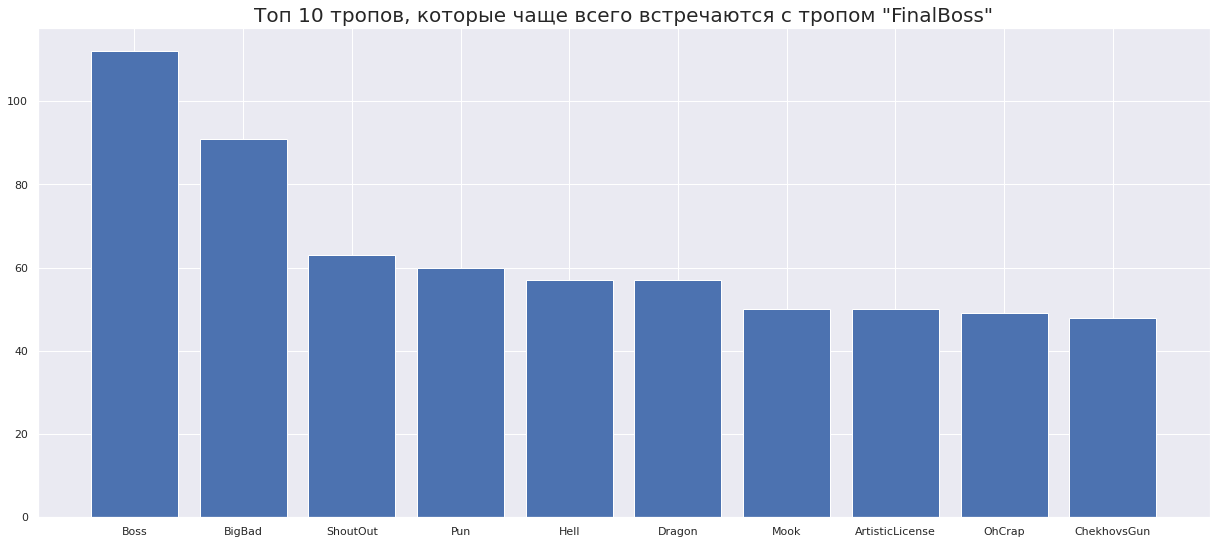

In [ ]:
visualize_intersection(df, "FinalBoss", 10)

## Задача 3

**Условие**: Найти самые популярные тропы 60-х, 70-х, 80-х, 90-х, 00-x

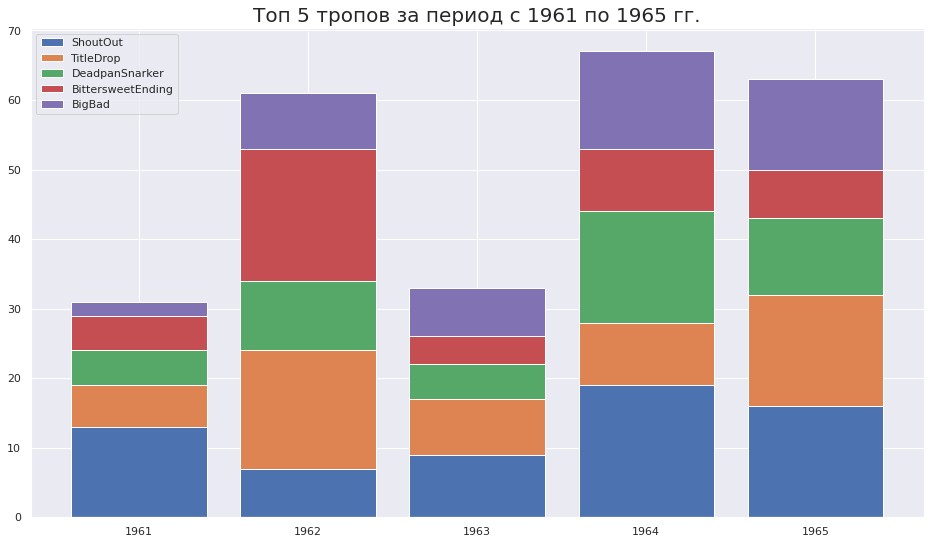

In [ ]:
visualize_preiod(df, 1961, 1965, 5)

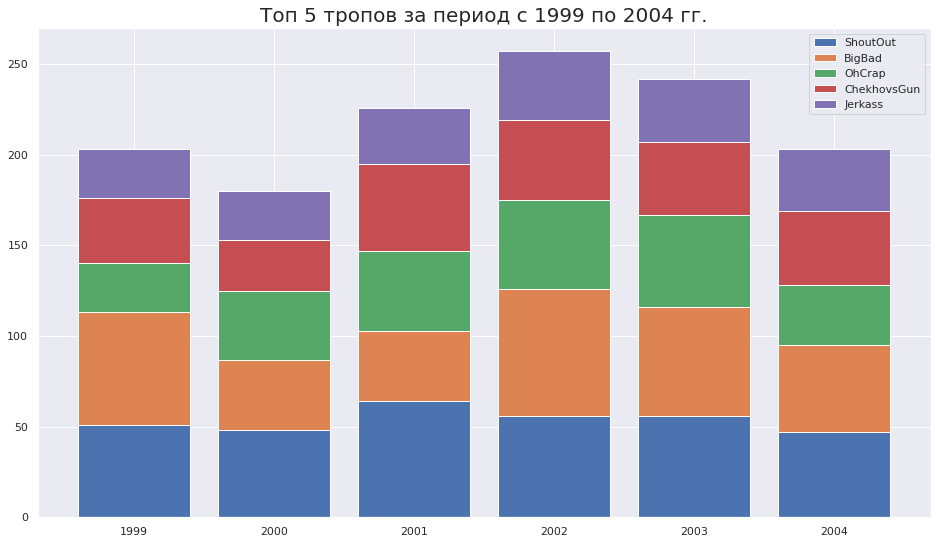

In [ ]:
visualize_preiod(df, 1999, 2004, 5)

## Задача 4

**Условие**:
Вывести тропы, которые встрчаются в самых популярных фильмах жанра


#### Получение датасета с movielense

In [12]:
!wget https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2022-11-01 13:07:34--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  21.3MB/s    in 6.8s    

2022-11-01 13:07:41 (36.9 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [13]:
!unzip ml-25m.zip

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


In [14]:
df_rating = pd.read_csv("/content/ml-25m/ratings.csv")

In [229]:
# df_rating = df_rating.drop(columns = ["userId", "timestamp"])
df_rating = df_rating.groupby(["movieId"]).mean().reset_index()
# df = df.join(df_rating)
df = df.merge(df_rating, left_on="movielens_id", right_on="movieId")

In [230]:
df

,tropes_title,tropes,imdb_id,imdb_genres,movielens_id,tmdb_id,movielens_title,movielens_genres,movielens_year,tropes_list,movieId,rating
0,ABBATheMovie,ActuallyPrettyFunny|Adorkable|AlmostKiss|AsHim...,75617,Comedy|Drama|Music,26380,14336,ABBA: The Movie (1977),Musical,1977.0,"[ActuallyPrettyFunny, Adorkable, AlmostKiss, A...",26380,2.750000
1,ABCsOfDeath2,AbusiveParents|AirVentPassageway|AirVentPassag...,2926810,Comedy|Horror,117312,193726,The ABCs of Death 2 (2014),Comedy|Horror,2014.0,"[AbusiveParents, AirVentPassageway, AirVentPas...",117312,2.791045
2,ABNKKBSNPLAko,ComingOfAgeStory|GayBestFriend|GenderInvertedT...,3547428,Comedy,176879,254866,ABNKKBSNPLAKo?! (2014),Comedy|Romance,2014.0,"[ComingOfAgeStory, GayBestFriend, GenderInvert...",176879,3.000000
3,ABeautifulMind,AdultFear|AllThereIsToKnowAboutTheCryingGame|A...,268978,Biography|Drama,4995,453,"Beautiful Mind, A (2001)",Drama|Romance,2001.0,"[AdultFear, AllThereIsToKnowAboutTheCryingGame...",4995,3.961099
4,ABetterTomorrow,AlmostLethalWeapons|BackupTwin|BadassInANiceSu...,92263,Action|Crime|Drama,26585,11471,"Better Tomorrow, A (Ying hung boon sik) (1986)",Crime|Drama|Thriller,1986.0,"[AlmostLethalWeapons, BackupTwin, BadassInANic...",26585,3.727405
...,...,...,...,...,...,...,...,...,...,...,...,...
8897,Zulu,AnachronismStew|AntagonistTitle|ArtisticLicens...,58777,Drama|History|War,5899,14433,Zulu (1964),Action|Drama|War,1964.0,"[AnachronismStew, AntagonistTitle, ArtisticLic...",5899,3.819773
8898,Zurich,ABirthdayNotABreak|AGoodWayToDie|AnAesop|Bitte...,3257638,Drama,141632,319513,Zurich (2015),Drama,2015.0,"[ABirthdayNotABreak, AGoodWayToDie, AnAesop, B...",141632,3.500000
8899,Zwartboek,AdolfHitlarious|AllIssuesArePoliticalIssues|Am...,389557,Drama|Thriller|War,52042,9075,Black Book (Zwartboek) (2006),Drama|Thriller|War,2006.0,"[AdolfHitlarious, AllIssuesArePoliticalIssues,...",52042,3.804563
8900,Zygote,AirventEscape|AnAxeToGrind|ArtificialHuman|Art...,7078780,Horror|Sci-Fi|Short,175643,464111,Zygote (2017),Horror|Sci-Fi,2017.0,"[AirventEscape, AnAxeToGrind, ArtificialHuman,...",175643,3.583333


#### Решение


In [68]:
df["movielens_genres"] = df["movielens_genres"].fillna("<NA>")
df["rating"] = df["rating"].fillna(-1)

In [157]:
def get_edge_films(df, genre, n: int = 5):
  if n >= 0:
    return df[df["movielens_genres"].str.contains(genre) & df["rating"] != -1 ].sort_values(by = "rating", ascending=False).head(n)
  return df[df["movielens_genres"].str.contains(genre) & df["rating"] != -1 ].sort_values(by = "rating", ascending=False).tail(n)

In [158]:
def get_edge_tropes(df, genre, films: int = 5, n: int = 10):
  edge = get_edge_films(df, genre, films)["tropes_list"]
  trop_counter = Counter()
  trop_counter.update(chain(*edge))
  return trop_counter.most_common(n)

In [169]:
def visualize_top_tropes(df, genre, films: int = 5, n: int = 10):
  tropes = get_edge_tropes(df, genre, films, n)
  X = []
  Y = []
  for name, count in tropes:
    X.append(name)
    Y.append(count)
  fig, ax = plt.subplots(figsize=(25,9))
  ax.bar(X,Y)
  if films >= 0:
    label = f"Топ {n} тропов в {films} лучших фильмах"
  else:
    label = f"Топ {n} тропов в {0-films} худших фильмов"
  plt.title(label)
  plt.show()

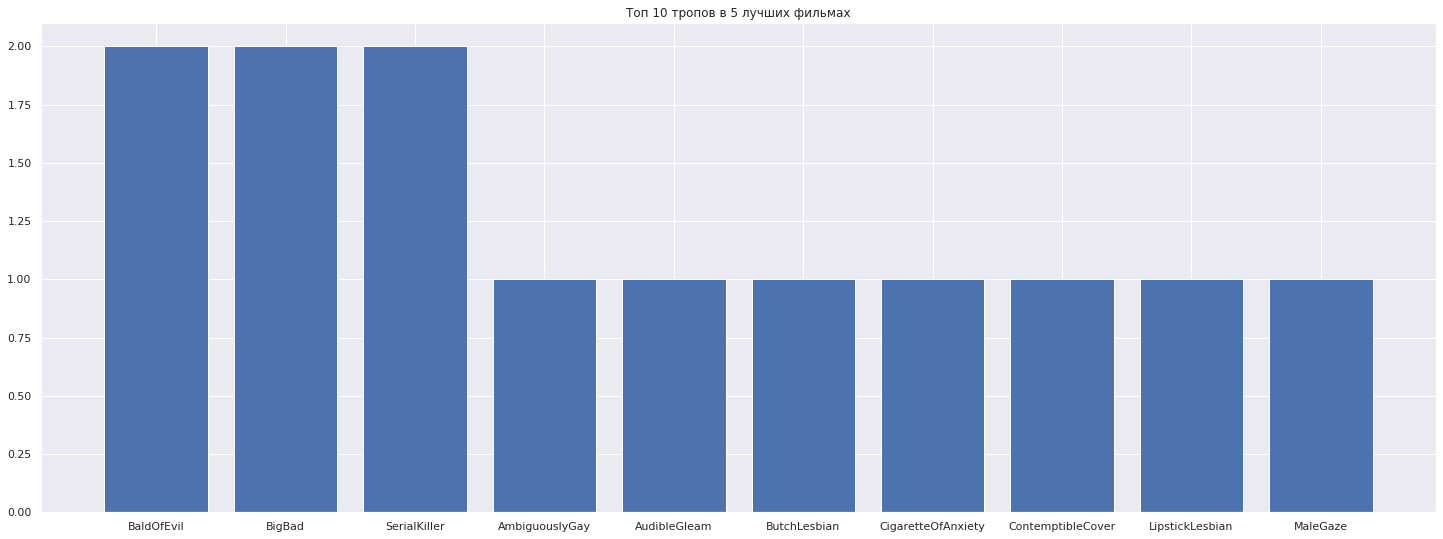

In [233]:
visualize_top_tropes(df, "Horror", 5)

## Задание 5

**Условие**: найти средний рейтинг фильмов для тропов

In [222]:
unique_trops = set()
for current_trops in df["tropes_list"]:
  unique_trops.update(current_trops)

In [224]:
len(unique_trops)

25759

In [231]:
from tqdm.auto import tqdm

tropes_avg_rating = {}
for trope in tqdm(unique_trops):
  trope_movies = df[df["tropes"].str.contains(trope)]
  tropes_avg_rating[trope] = trope_movies["rating"].mean()

  0%|          | 0/25759 [00:00<?, ?it/s]

In [236]:
tropes_avg_rating

{'GenderBenderAngst': 2.2,
 'PromotionalConsideration': 3.495295698924731,
 'Kawaiiko': 3.4375,
 'InformedKindness': 3.563522427446594,
 'PintsizedPowerhouse': 3.3221040187545894,
 'AnythingButThat': 3.1434036992248435,
 'PokeThePoodle': 3.047680412833324,
 'StepUp': 3.3101955791316016,
 'ShootTheMessenger': 3.151449220885825,
 'LookOnMyWorksYeMightyAndDespair': 2.7128324468085108,
 'WhatBeautifulEyes': 3.308025056998806,
 'HastilyHiddenMacGuffin': 3.134522340040696,
 'BachelorAuction': 3.480185223367848,
 'ReplacementGoldfish': 3.2937182989188476,
 'MysteriousBacker': 3.139060344797717,
 'NarmCharm': 3.2156621188350667,
 'Masquerade': 3.2388191990170503,
 'StealingTheCredit': 3.479318393744312,
 'TerritorialSmurfette': 3.432461927674984,
 'GrimReaper': 3.3918358253759346,
 'AffluentAscetic': 2.7309027777777777,
 'DiscussedTrope': 3.470754275882844,
 'EndingByAscending': 3.6183434974135156,
 'OutfitDecoy': 3.384971973297195,
 'EyeTropes': 3.9765444334324416,
 'SedgwickSpeech': 3.179358

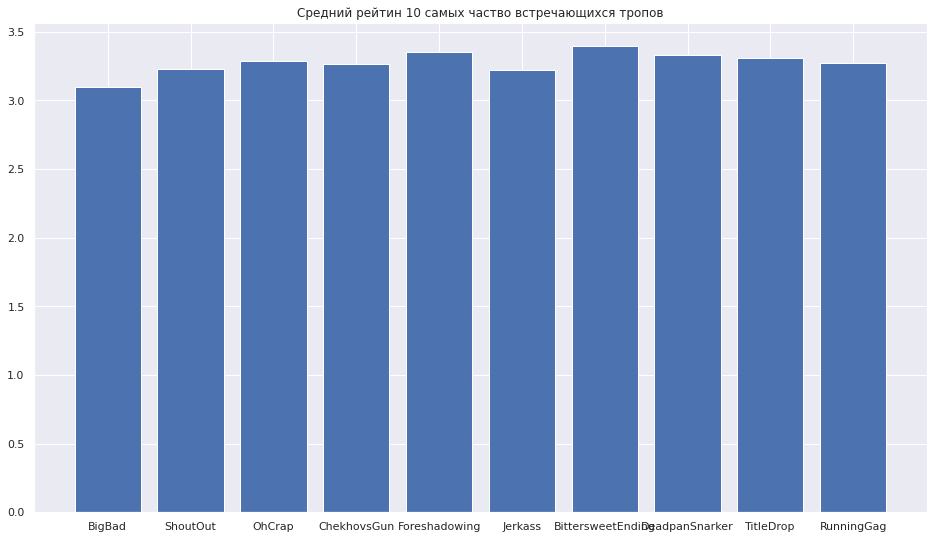

In [237]:
fig, ax = plt.subplots(figsize=(16,9))

n = 10
top_tropes = top_tropes(df, n)
X = []
Y = []
for name, count in top_tropes:
  X.append(name)
  Y.append(tropes_avg_rating[name])
ax.bar(X,Y)
plt.title(f"Средний рейтин {n} самых частво встречающихся тропов")
plt.show()